# Дипломная работа

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [2]:
data = pd.read_csv('taxi.csv')
data

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,726210,0,2,2442,27360,55.961246,37.413497,55.966694,37.415754,17.378,29.817,Economy,private,0
99996,881472,0,1,2442,381960,55.961246,37.413497,55.964892,37.413543,7.751,12.683,Economy,private,0
99997,626673,1,20,2442,627126,55.961315,37.413497,55.962203,37.416373,46.983,46.217,Standard,private,0
99998,672584,6,21,2442,140623,55.961354,37.413864,55.964892,37.413543,50.029,51.100,Economy,private,0


## Описание данных

In [3]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

* offer_gk - возможно, ID заказа
* weekday_key - ID дня недели заказа
* hour_key - ID часа в сутках из времени заказа
* order_gk - возможно, ID клиента
* driver_latitude, driver_longitude - возможно, координаты местоположения водителя при приеме заказа
* origin_order_latitude, origin_order_longitude - возможно, координаты местоположения клиента при приеме заказа
* distance_km - расстояние поездки
* duration_min - длительность поездки
* offer_class_group - уровень предоставляемого сервиса, категория
* ride_type_desc - тип поездки, категория

### Особенности

* offer_gk - похоже на ID заказа, не является полезным для выборки, удаляем
* distance_km, duration_min - имеют выбросы
* distance_km, duration_min - более четверти значений отсутсвуют (равны -1)
* driver_latitude, driver_longitude - имеют часть отсутствующих значений
* origin_order_latitude, origin_order_longitude - имеют часть отсутствующих значений

## Зависимости

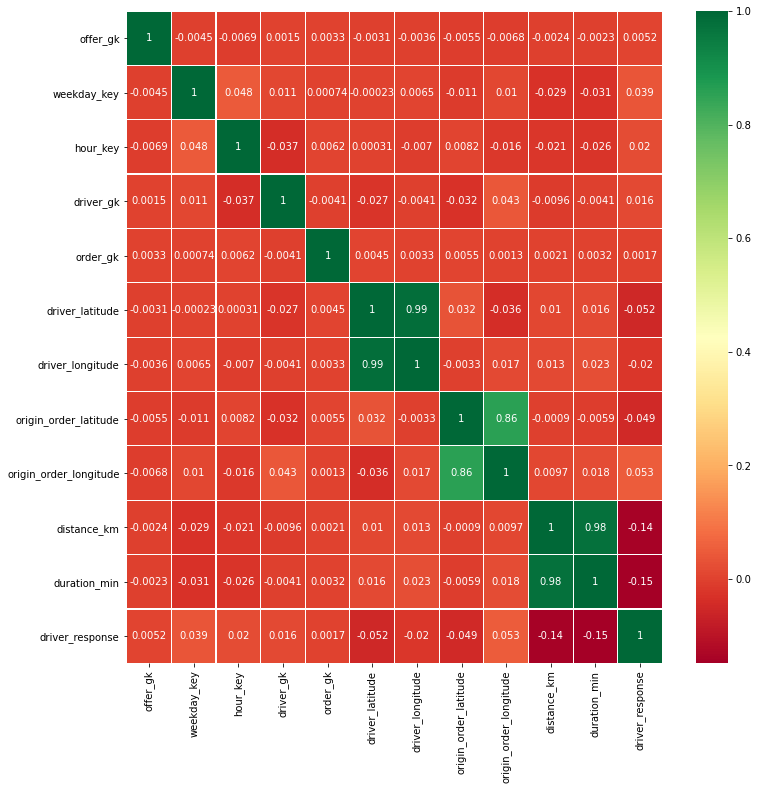

In [5]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

Зависимы между собой:
* driver_latitude и driver_longitude
* origin_order_latitude и origin_order_longitude
* distance_km
* duration_min

## Параметр distance_km
Заполним пропуски значений средними значениями по weekday_key и hour_key

In [6]:
# расчитаем среднее по weekday_key и hour_key
dis = data.groupby(['weekday_key', 'hour_key'])['distance_km'].mean().reset_index()
dis.head(10)

,weekday_key,hour_key,distance_km
0,0,0,23.345422
1,0,1,21.564261
2,0,2,19.657501
3,0,3,19.917273
4,0,4,26.015585
5,0,5,28.884600
6,0,6,29.396500
7,0,7,20.383589
8,0,8,20.943990
9,0,9,17.251558


In [7]:
# заполним отрицательные значения средними

def fill_distance(row):
    avg = dis[(dis['weekday_key'] == row['weekday_key']) & (dis['hour_key'] == row['hour_key'])] ['distance_km'].mean()
    if row['distance_km'] > 0:
        val = row['distance_km']
    else:
        val = avg
        
    return val

data['new_distance_km'] = data.apply(fill_distance, axis=1)

In [8]:
# удаляем вспомогательный параметр
data['distance_km'] = data['new_distance_km']
data.drop(['new_distance_km'], axis=1, inplace=True)

In [9]:
# округлим значения до сотых
data['distance_km'] = data['distance_km'].round(decimals=2)

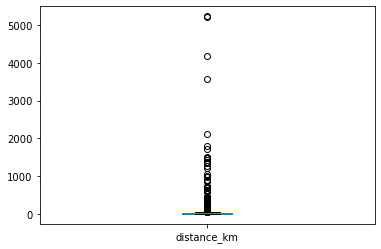

In [10]:
data['distance_km'].plot(kind='box')

In [11]:
# удалим выборосы
data['distance_km'].quantile(0.99)

75.35019999999989

In [12]:
data.shape, data[data['distance_km'] < data['distance_km'].quantile(0.99)].shape

((100000, 14), (99000, 14))

In [13]:
data = data[data['distance_km'] < data['distance_km'].quantile(0.99)]

## Параметр duration_min
Заполним пропуски значений средними значениями по weekday_key и hour_key

In [14]:
# расчитаем среднее по weekday_key и hour_key
dur = data.groupby(['weekday_key', 'hour_key'])['duration_min'].mean().reset_index()
dur.head(10)

,weekday_key,hour_key,duration_min
0,0,0,25.782900
1,0,1,26.260316
2,0,2,25.497140
3,0,3,23.743166
4,0,4,28.738910
5,0,5,29.279530
6,0,6,33.347274
7,0,7,25.061577
8,0,8,25.119858
9,0,9,22.365664


In [15]:
# заполним отрицательные значения средними

def fill_duration(row):
    avg = dur[(dur['weekday_key'] == row['weekday_key']) & (dur['hour_key'] == row['hour_key'])] ['duration_min'].mean()
    if row['duration_min'] > 0:
        val = row['duration_min']
    else:
        val = avg
        
    return val

data.loc[:,'new_duration_min'] = data.apply(fill_duration, axis=1)

In [16]:
# удаляем вспомогательный параметр
data.loc[:,'duration_min'] = data['new_duration_min']
data.drop(['new_duration_min'], axis=1, inplace=True)

In [17]:
# округлим значения до сотых
data['duration_min'] = data['duration_min'].round(decimals=2)

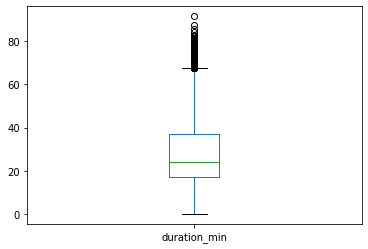

In [18]:
data['duration_min'].plot(kind='box')

In [19]:
data.head(2)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,17.68,21.03,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.80,25.22,Standard,private,1


## Параметр offer_gk
Удалим параметр, так как он не является смысловым

In [20]:
data.drop(['offer_gk'], axis=1, inplace=True)

In [21]:
data.head(2)

,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,17.68,21.03,Economy,private,0
1,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.80,25.22,Standard,private,1


## Параметры driver_latitude - origin_order_longitude
Расчитаем расстояние между двух точек

In [22]:
len(data[data['driver_latitude'] < 0]), len(data[data['origin_order_latitude'] < 0])

(135, 13)

In [23]:
# удалим строки с отрицательными значениями
data = data[data['driver_latitude'] > 0]
data = data[data['origin_order_latitude'] > 0]
len(data[data['driver_longitude'] < 0]), len(data[data['origin_order_longitude'] < 0])

(0, 0)

In [24]:
# найдем расстоянием между точками driver и origin_order
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

data['order_distance'] = haversine(data.driver_longitude, data.driver_latitude, 
                                    data.origin_order_longitude, data.origin_order_latitude)

In [25]:
# округлим значения до сотых
data['order_distance'] = data['order_distance'].round(decimals=2)

In [26]:
# удалим driver_latitude - origin_order_longitude, так как их заменяет order_distance
data.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1, inplace=True)

In [27]:
data.head(2)

,weekday_key,hour_key,driver_gk,order_gk,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,order_distance
0,5,20,6080,174182,17.68,21.03,Economy,private,0,2.30
1,5,14,6080,358774,18.80,25.22,Standard,private,1,5.55


## Параметры offer_class_group, ride_type_desc

In [28]:
# преобразуем параметры с помощью label encoder
label_enc = LabelEncoder()
columns_for_encode = ['offer_class_group', 'ride_type_desc']
for column in columns_for_encode:
    data[column + '_enc'] = label_enc.fit_transform(data[column])

In [29]:
# удаляем исходные параметры
data.drop(['offer_class_group', 'ride_type_desc'], axis=1, inplace=True)

In [30]:
data.head(2)

,weekday_key,hour_key,driver_gk,order_gk,distance_km,duration_min,driver_response,order_distance,offer_class_group_enc,ride_type_desc_enc
0,5,20,6080,174182,17.68,21.03,0,2.30,1,3
1,5,14,6080,358774,18.80,25.22,1,5.55,4,3


## Обучение модели
Используем RandomForest

In [38]:
# входные данные
X = data.drop(['driver_response'], axis=1)
# вектор целевых значений
y = data['driver_response']

Train MAE: 2.8903822530529664e-05
Test MAE: 0.23374696520097113


No handles with labels found to put in legend.


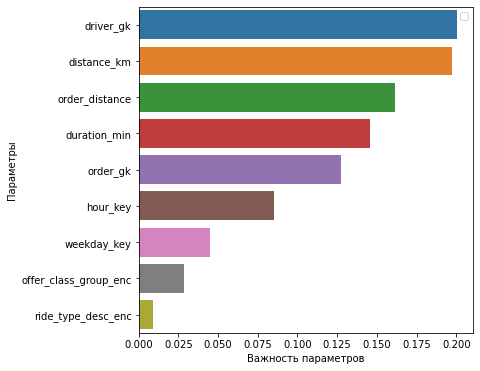

In [39]:
# делим выборку на test и train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# обучаем модель
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# обучаемое предсказание
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# сравнение предсказания и реального результата
print('Train MAE: {}'.format(mean_absolute_error(train_predict, y_train)))
print('Test MAE: {}'.format(mean_absolute_error(test_predict, y_test)))
model.score(X_test, y_test)

# список параметров
headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_, index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность параметров')
plt.ylabel('Параметры')
plt.legend()
plt.show()

In [40]:
# среднее значение целевого параметра
data['driver_response'].mean()

0.49376334078562684

In [43]:
# сравнение реальных данных с предсказаниями

# реальные данные
y_vals = pd.DataFrame({'driver_response':y_test})
# предсказанные значения
y_vals['prediction'] = model.predict(X_test).tolist()
y_vals.sort_values(by='driver_response', inplace=True)

y_vals.sample(10)

,driver_response,prediction
43435,1,0
32234,0,0
92271,1,1
94098,0,1
66623,0,1
81094,1,1
52898,1,1
81543,1,1
39974,0,0
54515,1,1


## Наблюдения
* MAE получилась примерно в два раза меньше среднего значения
* Ниаиболее влиятельный параметр - driver_gk (Id водителя). Выбор да/нет прежде всего определяется индивидуальными прдпочтениями водителя
* Параметр distance_km оказывает большее влияние, чем duration_min. Возможно, потому что для водителя это более важная величина для оценки поездки.
* Параметр order_distance (рассояние между водителем и клиентом при вызове) также является одним из определяющих.
* Время суток (hour_key) имеет большее влияние на результат чем день недели (weekday_key).  